In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [2]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Na 3

In [24]:
numeric_columns = data.select_dtypes(include='number')
cat_columns = data.select_dtypes(include='object')

print(numeric_columns.describe(percentiles=[0.05, 0.95]))
print(numeric_columns.median())
print(numeric_columns.isnull().sum())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
5%       17.891428     1.548291    48.500000     1.523214     1.000000   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
95%      38.098070     1.850000   131.916152     3.000000     3.750881   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
5%        1.000000     0.000000     0.000000  
50%       2.000000     1.000000     0.625350  
95% 

In [4]:
print(cat_columns.nunique(dropna=True))
print(cat_columns.isnull().sum())
for col in cat_columns:
    print(cat_columns[col].value_counts(normalize=True))
#print(cat_columns.apply(lambda col: col.value_counts(normalize=True)))

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              4
MTRANS                            5
NObeyesdad                        7
dtype: int64
Gender                            0
family_history_with_overweight    0
FAVC                              0
CAEC                              0
SMOKE                             0
SCC                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Gender
Male      0.505921
Female    0.494079
Name: proportion, dtype: float64
family_history_with_overweight
yes    0.817622
no     0.182378
Name: proportion, dtype: float64
FAVC
yes    0.883941
no     0.116059
Name: proportion, dtype: float64
CAEC
Sometimes     0.836097
Frequently    0.114638
Always        0.025107
no      

# Boxplots

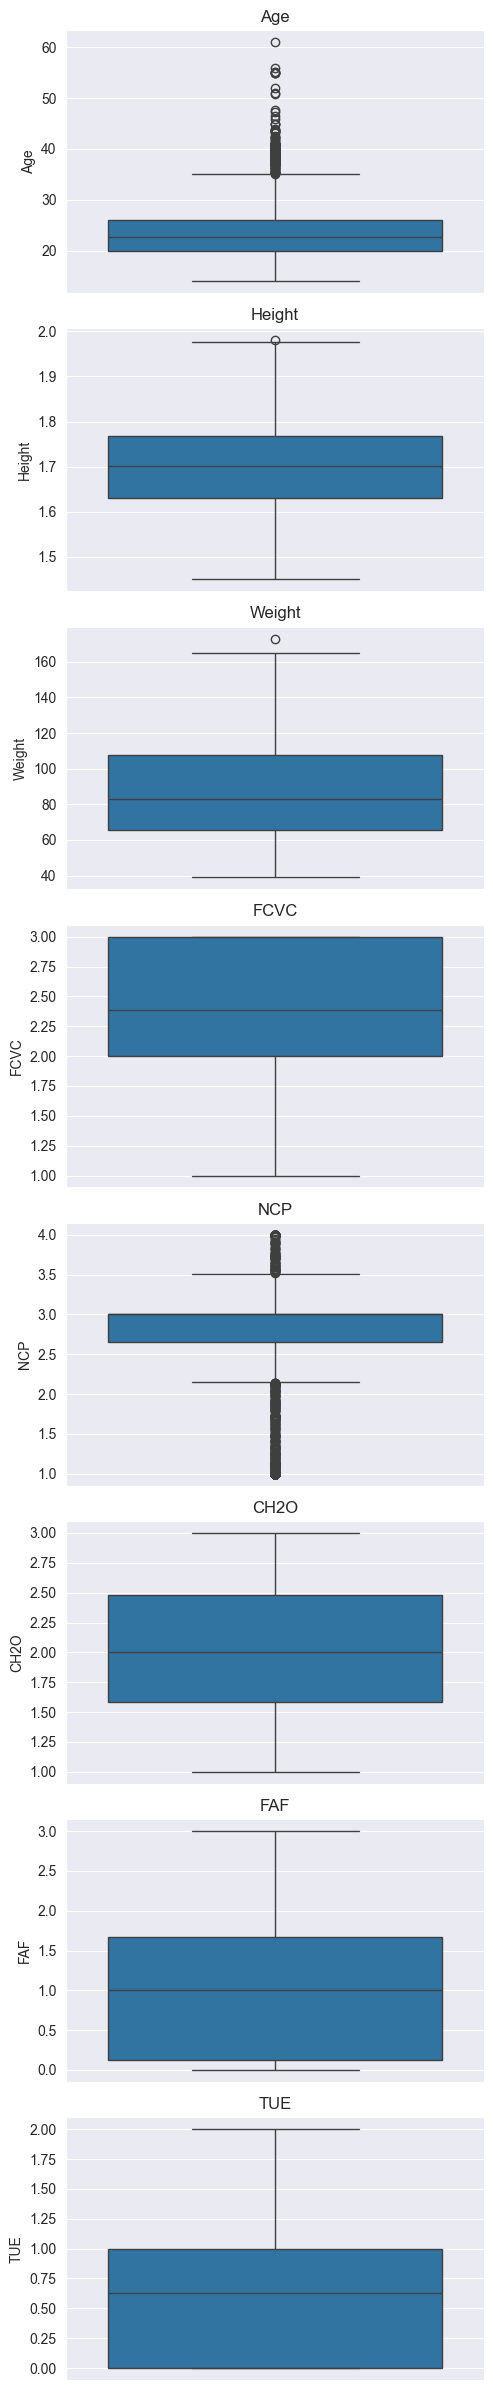

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(numeric_columns.columns), ncols=1, figsize=(5, 3*len(numeric_columns.columns)))

if len(numeric_columns.columns)==1:
    axes = [axes]

for ax, col in zip(axes, numeric_columns):
    sns.boxplot(data=numeric_columns, y=numeric_columns[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

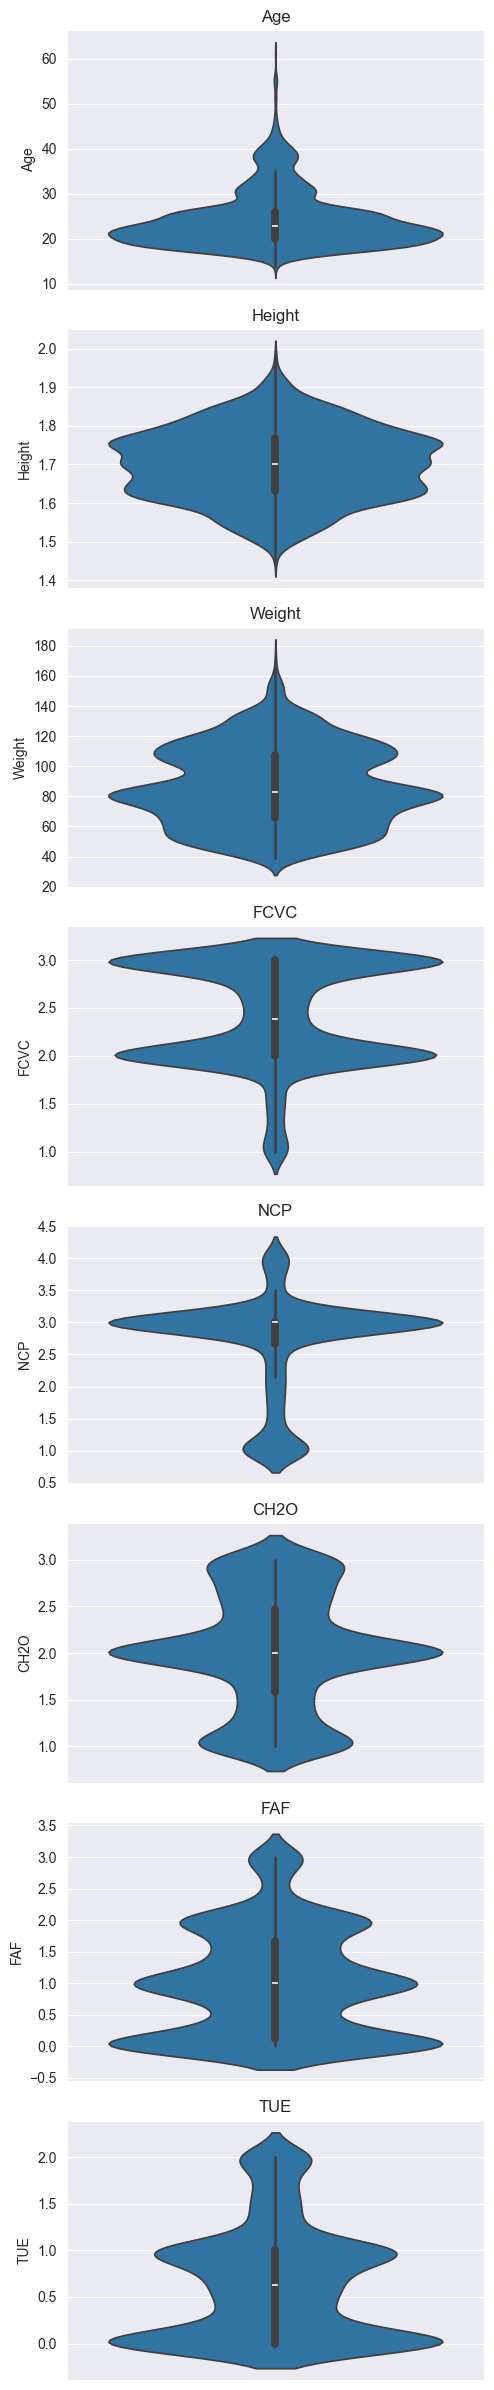

In [6]:
fig, axes = plt.subplots(nrows=len(numeric_columns.columns), ncols=1, figsize=(5, 3*len(numeric_columns.columns)))

if len(numeric_columns.columns)==1:
    axes = [axes]

for ax, col in zip(axes, numeric_columns):
    sns.violinplot(data=numeric_columns, y=numeric_columns[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

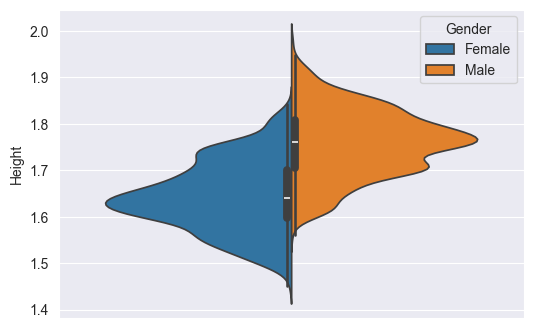

In [47]:
plt.figure(figsize=(6,4))
sns.violinplot(data=data, y=numeric_columns['Height'], hue='Gender', split = True)
plt.show()

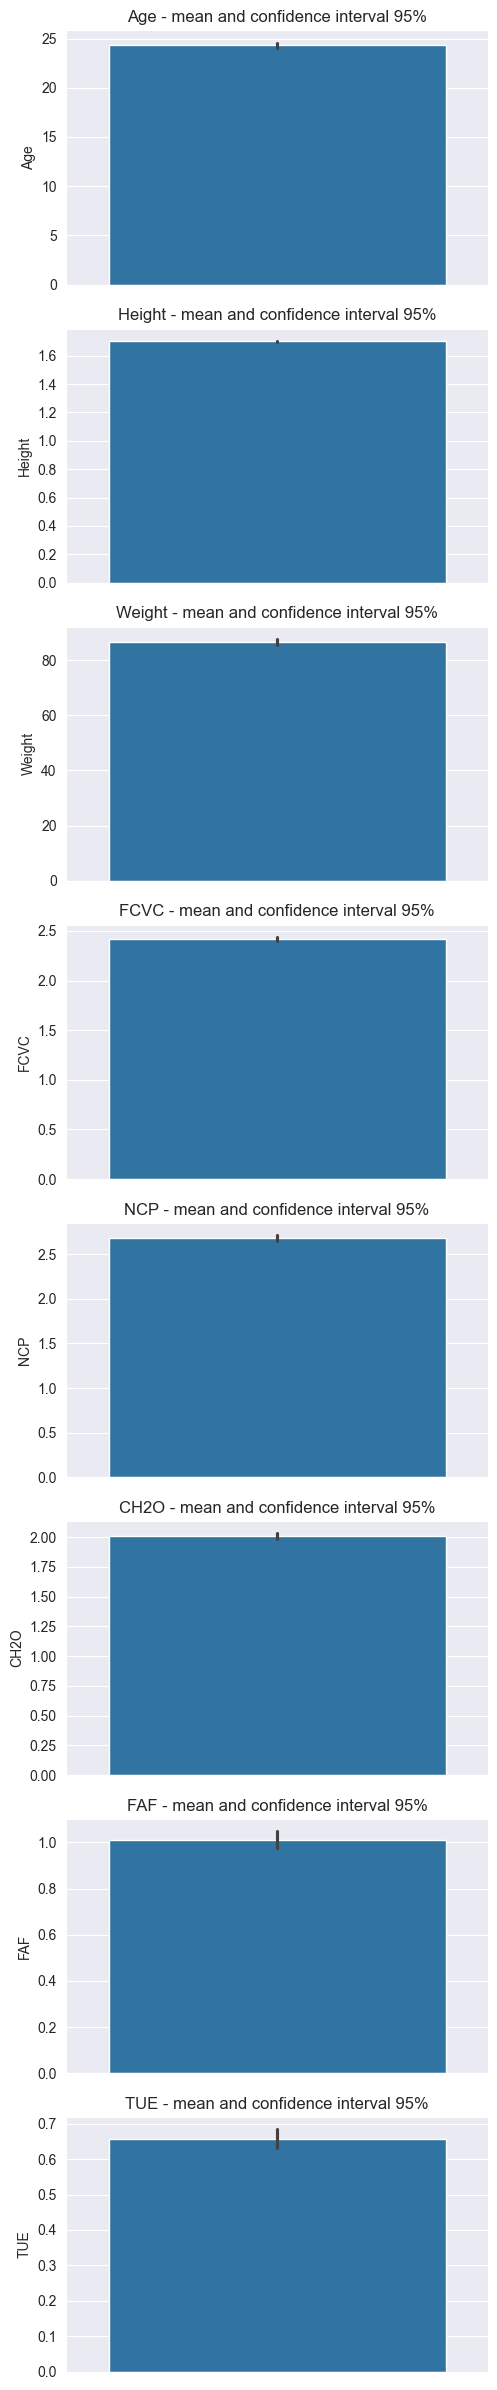

In [7]:
fig, axes = plt.subplots(nrows=len(numeric_columns.columns), ncols=1, figsize=(5, 3*len(numeric_columns.columns)))

if len(numeric_columns.columns)==1:
    axes=[axes]

for ax, col in zip(axes, numeric_columns):
    sns.barplot(data=numeric_columns, y=numeric_columns[col], ax=ax)
    ax.set_title(f'{col} - mean and confidence interval 95%')

plt.tight_layout()
plt.show()

In [8]:
print(numeric_columns.corr('spearman'))

             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.002956  0.356771  0.061594 -0.105668  0.013064 -0.208314   
Height -0.002956  1.000000  0.462548 -0.056079  0.203787  0.225237  0.325870   
Weight  0.356771  0.462548  1.000000  0.208417  0.002875  0.225592 -0.043871   
FCVC    0.061594 -0.056079  0.208417  1.000000  0.086187  0.065693  0.027688   
NCP    -0.105668  0.203787  0.002875  0.086187  1.000000  0.070227  0.144912   
CH2O    0.013064  0.225237  0.225592  0.065693  0.070227  1.000000  0.155720   
FAF    -0.208314  0.325870 -0.043871  0.027688  0.144912  0.155720  1.000000   
TUE    -0.298076  0.081548 -0.049870 -0.087514  0.087268  0.023162  0.050629   

             TUE  
Age    -0.298076  
Height  0.081548  
Weight -0.049870  
FCVC   -0.087514  
NCP     0.087268  
CH2O    0.023162  
FAF     0.050629  
TUE     1.000000  


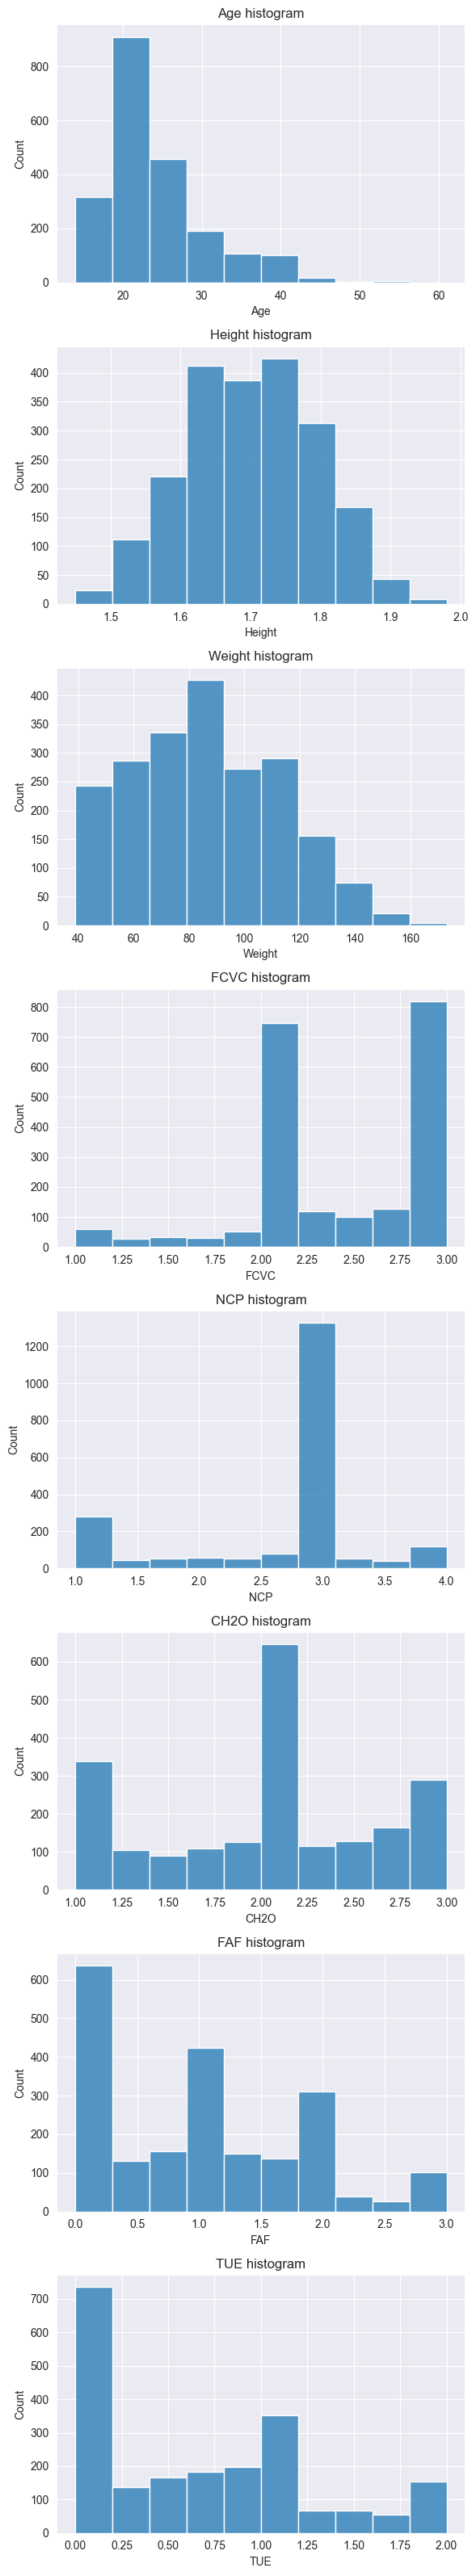

In [9]:
fig, axes = plt.subplots(nrows=len(numeric_columns.columns), ncols=1, figsize=(6, 4 * len(numeric_columns.columns)))

for ax, col in zip(axes, numeric_columns):
    sns.histplot(data=numeric_columns[col], bins=10, ax=ax)
    ax.set_title(f'{col} histogram')

plt.tight_layout()
plt.show()

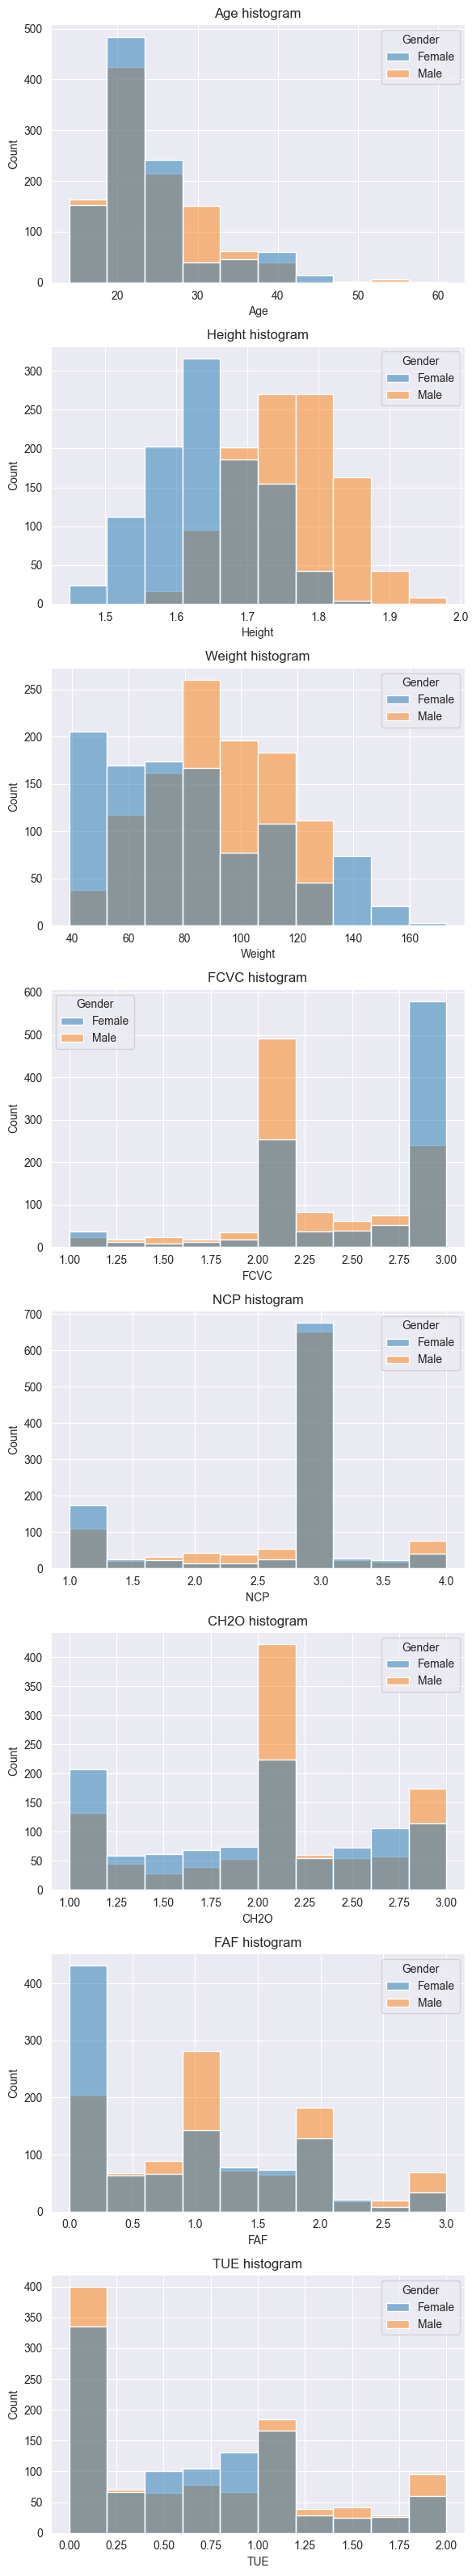

In [50]:
fig, axes = plt.subplots(nrows=len(numeric_columns.columns), ncols=1, figsize=(6, 4 * len(numeric_columns.columns)))

for ax, col in zip(axes, numeric_columns):
    sns.histplot(data=data, bins=10, x=col, ax=ax, hue='Gender')
    ax.set_title(f'{col} histogram')

plt.tight_layout()
plt.show()

             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  


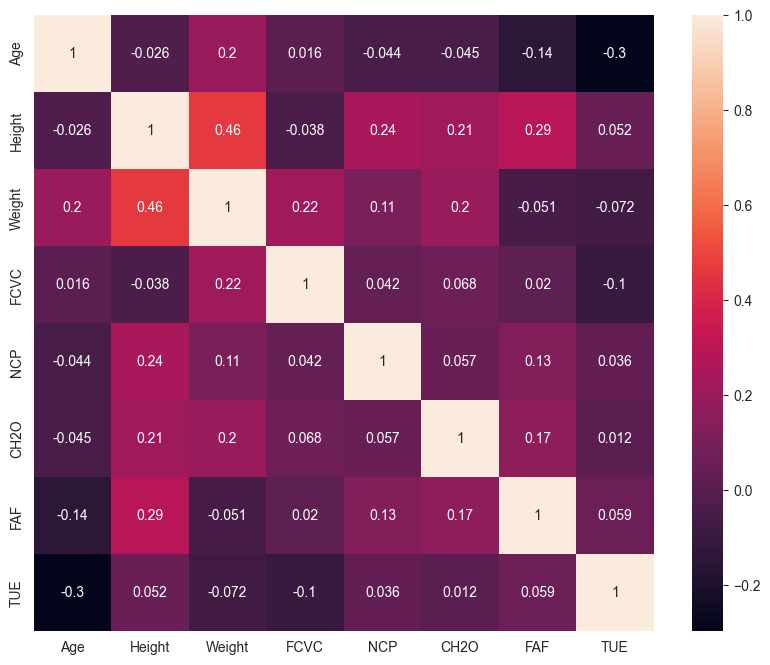

In [33]:
plt.figure(figsize=(10, 8))
num_corr_matrix = numeric_columns.corr()
corr_df = pd.DataFrame(num_corr_matrix)
print(corr_df.head())
sns.heatmap(num_corr_matrix, annot=True)
plt.show()

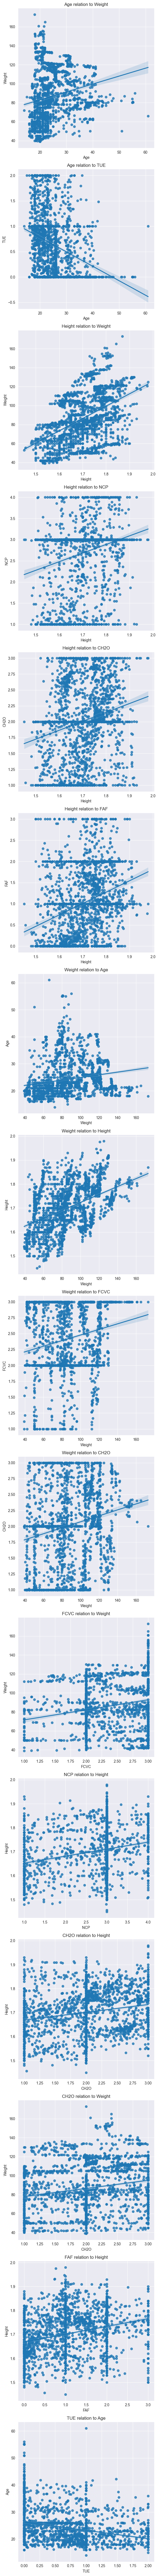

In [51]:
fig, axes = plt.subplots(nrows=16, ncols=1, figsize=(6, 96))

i=0
for col1 in numeric_columns:
    for col2 in numeric_columns:
        if col1!=col2:
            if abs(corr_df[col1][col2]) >= 0.2:
                sns.regplot(x=data[col1], y=data[col2], ax=axes[i], x_jitter=0)
                axes[i].set_title(f'{col1} relation to {col2}')
                i+=1

plt.tight_layout()
plt.show()